# Kiva relies almost exclusively on partners to broker loans. Who are these partners?

## Import data

At the beginning of our notebooks we always import all the libraries we will use.

In [3]:
import pandas as pd
import numpy as np
from ggplot import *
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser
pd.options.display.mpl_style = 'default'

# the matplotlib inline command is important, it tells jupyter notebook to show the output of the cell for charts
%matplotlib inline

/Users/Sara/anaconda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/Sara/anaconda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/Sara/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/Sara/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_

You are using Jupyter notebook to run your code. it is an incredibly versatile tool and we can tailor the configurations to suit our preferences. For example, in the cell below we tell Jupyter to output the results of all commands in a cell (the default is only to output the results of the last command). For more interesting and incredibly useful Jupyter tricks take a look at [this](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/) blog post. Using Jupyter shortcuts will help you work faster. Some valuable shortcuts have been put together in [this](http://www.math.umassd.edu/~ahausknecht/aohWebsiteSpring2017/examples/pythonExamples/downloads/docs/JuypterKeyboardShortcutsV1Sp2016.pdf) great pdf.

In [4]:
# the command below means that the output of multiple commands in a cell will be output at once.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

We use a pandas command to tailor how the data is presented in the command below. There are 76 columns in our final Kiva dataset. The default panda settings hide some of the columns. We make all columns visible by setting the display to 80.

In [5]:
# the command below tells jupyter to display up to 80 columns, this keeps everything visible
pd.set_option('display.max_columns', 80)
pd.set_option('expand_frame_repr', True)

We set the path below, you should change this path to whatever folder you save the data you download from the google drive [here](https://drive.google.com/drive/folders/0BzVUQjOmkeDIYnhCalBkRVRNY1k?usp=sharing) into.

In [6]:
data_path = '~/intro_course_data_science_for_good/data'

## Import data

In [7]:
df=pd.read_csv(data_path+'/df.csv', low_memory=False)

In the cell below, we take a random sample of 3 rows to get a feel for the data.

In [8]:
df.sample(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,activity,basket_amount,bonus_credit_eligibility,borrowers,currency_exchange_loss_amount,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_amount,funded_date,id,image.id,image.template_id,journal_totals.bulkEntries,journal_totals.entries,lender_count,loan_amount,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,partner_id,payments,planned_expiration_date,posted_date,sector,status,tags,terms.disbursal_amount,terms.disbursal_currency,terms.disbursal_date,terms.loan_amount,terms.local_payments,terms.loss_liability.currency_exchange,terms.loss_liability.currency_exchange_coverage_rate,terms.loss_liability.nonpayment,terms.repayment_interval,terms.repayment_term,terms.scheduled_payments,themes,translator.byline,translator.image,use,video.id,video.thumbnailImageId,video.title,video.youtubeId,borrower_count,partner_average_loan_size_percent_per_capita_income,partner_charges_fees_and_interest,partner_countries,partner_currency_exchange_loss_rate,partner_default_rate,partner_default_rate_note,partner_delinquency_rate,partner_delinquency_rate_note,partner_image.id,partner_image.template_id,partner_loans_at_risk_rate,partner_loans_posted,partner_name,partner_portfolio_yield,partner_portfolio_yield_note,partner_profitability,partner_rating,partner_social_performance_strengths,partner_start_date,partner_status,partner_total_amount_raised,partner_url
41420,42904,42904,42884,Farming,NaN,False,"[{'first_name': 'Pauline', 'last_name': '', 'g...",NaN,['en'],"Pauline is 22 years old, married, and she supp...",NaN,NaN,NaN,275,2015-06-23T01:03:37Z,890109,1874352,1,0,0,7,275,Kenya,KE,town,-0.683333 34.766667,point,Kisii,Pauline,133.0,[],2015-06-24T22:10:07Z,2015-05-25T22:10:07Z,Agriculture,funded,"[{'name': '#Vegan'}, {'name': '#Supporting Fam...",25000.0,KES,2015-04-29T07:00:00Z,275,[],shared,0.1,lender,NaN,13,[],NaN,NaN,NaN,To purchase farm inputs such as fertilizers an...,NaN,NaN,NaN,NaN,1,34.9,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.089354,3.652283,NaN,8.017062,NaN,1495190.0,1.0,16.058249,30794.0,VisionFund Kenya,36.0,NaN,-1.7,2.5,"[{'id': 1, 'name': 'Anti-Poverty Focus', 'desc...",2009-05-29T11:35:11Z,active,11366975.0,http://www.visionfundkenya.co.ke/
101606,111248,111248,111190,Arts,NaN,False,"[{'first_name': ' Okari', 'last_name': '', 'ge...",NaN,['en'],"Okari, aged 30, is married to Hellen. He sells...",NaN,NaN,NaN,225,2011-07-29T19:54:54Z,322033,824293,1,0,0,9,225,Kenya,KE,town,1 38,point,Westlands,Okari,133.0,[],NaN,2011-07-29T05:50:05Z,Arts,funded,[],20000.0,KES,2011-07-20T07:00:00Z,225,[],shared,0.2,lender,NaN,8,[],NaN,NaN,NaN,To buy curios.,NaN,NaN,NaN,NaN,1,34.9,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.089354,3.652283,NaN,8.017062,NaN,1495190.0,1.0,16.058249,30794.0,VisionFund Kenya,36.0,NaN,-1.7,2.5,"[{'id': 1, 'name': 'Anti-Poverty Focus', 'desc...",2009-05-29T11:35:11Z,active,11366975.0,http://www.visionfundkenya.co.ke/


## a handful of partners dominate lending on Kiva

In this section, we gain an understanding of KIVA's partners on the ground and how important they are to the work KIVA does.

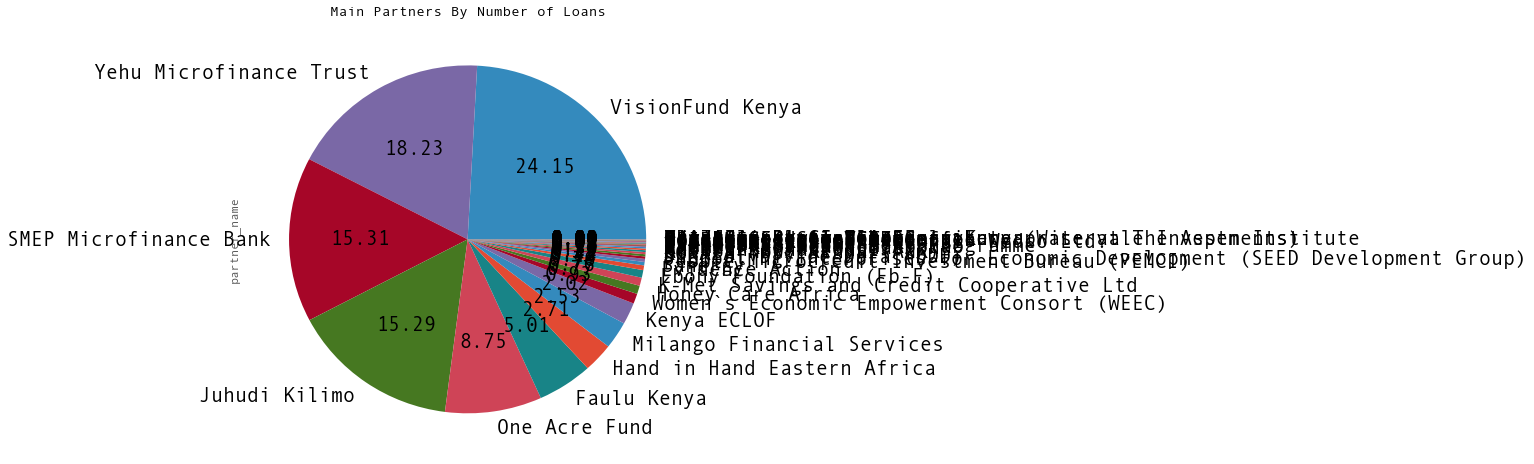

In [9]:
df['partner_name'].value_counts().plot(kind='pie',title='Main Partners By Number of Loans', autopct='%.2f', fontsize=20, figsize=(8, 8))

From the chart above we can see that just a few loaning partners are dominating the loan market in Kenya. The biggest loaning partner VisionFund Kenya has responsible for close to one quarter of all loans in Kenya. 

We can also look at the top lending partners in terms of the total number of dollars loaned. This chart is a more than a little messy (we have a cleaner bar chart below), but it shows that some previously small loan partners like One Acre Fund are much bigger when you consider the dollars funded. This is probably because One Acre Fund operates in the agriculture sector which we know from analysis earlier in the notebook to be the top sector in terms of dollars funded.

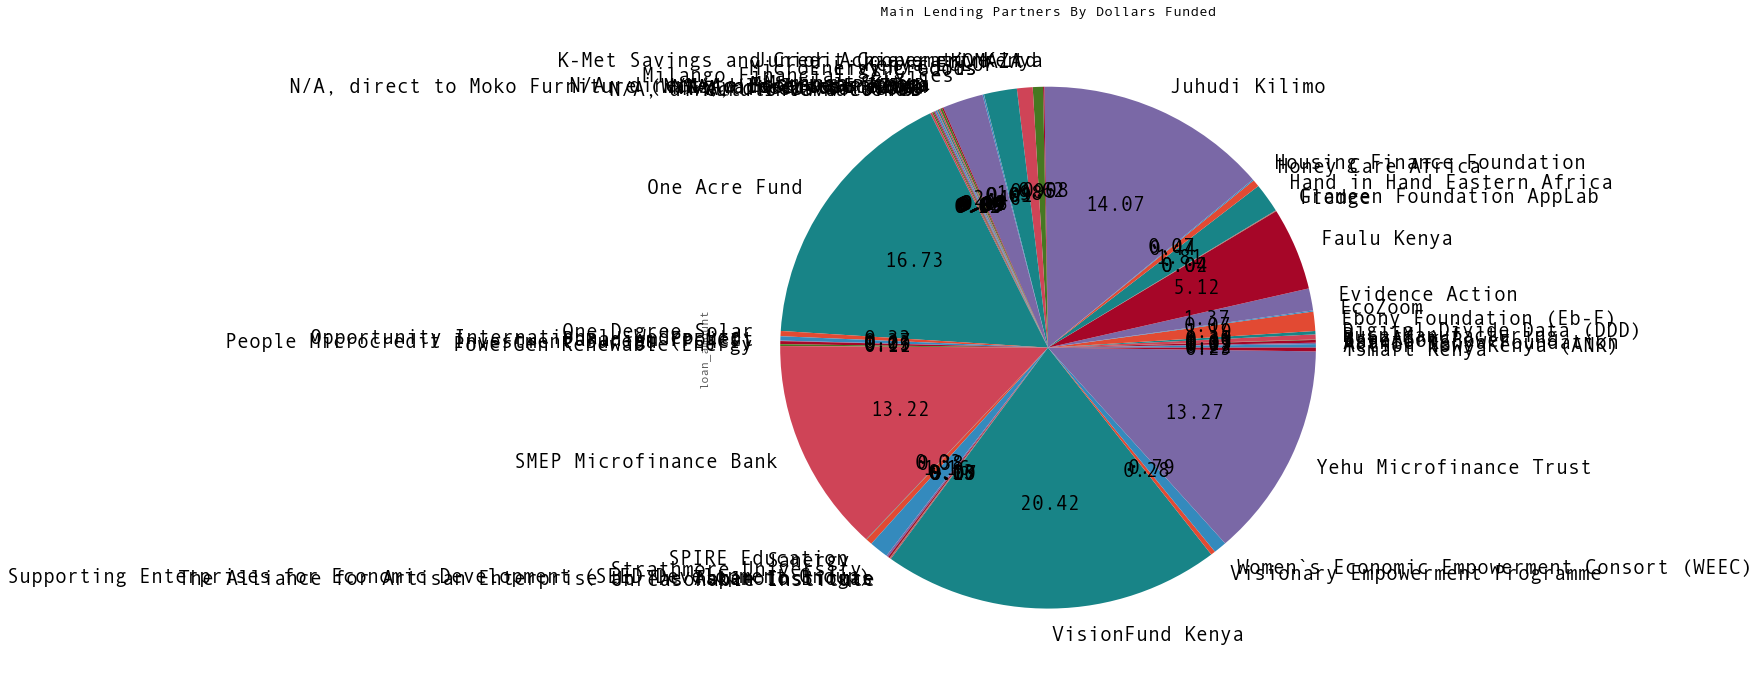

In [10]:
df.groupby('partner_name')['loan_amount'].sum().plot(kind='pie',title='Main Lending Partners By Dollars Funded',autopct='%.2f', fontsize=20, figsize=(12, 12))

## VisionFund has loaned more than 1 million dollars

In [11]:
df.groupby('partner_name')['loan_amount'].sum().nlargest(15)

partner_name
VisionFund Kenya                               11960875
One Acre Fund                                   9800175
Juhudi Kilimo                                   8245775
Yehu Microfinance Trust                         7774375
SMEP Microfinance Bank                          7746150
Faulu Kenya                                     2998575
Milango Financial Services                      1440700
Kenya ECLOF                                     1162850
Hand in Hand Eastern Africa                     1059875
Evidence Action                                  799950
Ebony Foundation (Eb-F)                          697975
Strathmore University                            677125
KOMAZA                                           554800
Women`s Economic Empowerment Consort (WEEC)      463325
K-Met Savings and Credit Cooperative Ltd         361650
Name: loan_amount, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

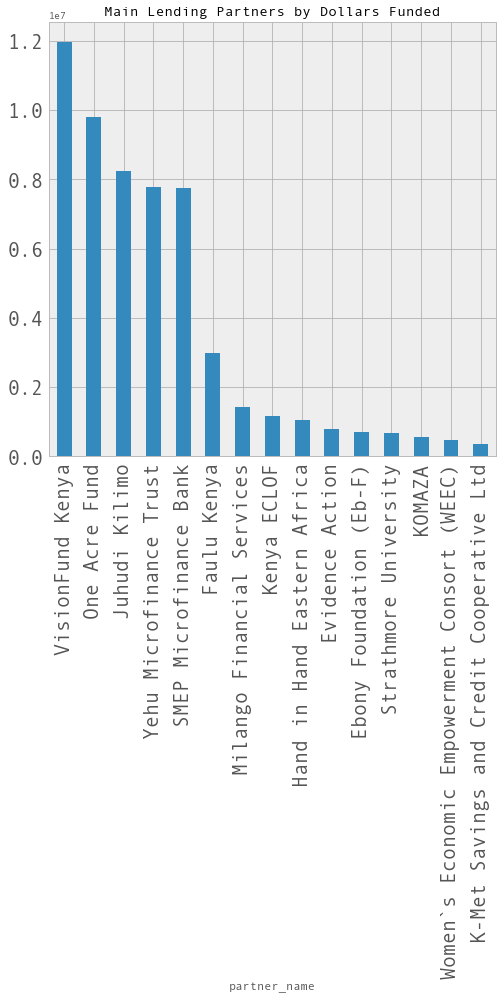

In [12]:
df.groupby('partner_name')['loan_amount'].sum().nlargest(15).plot(kind="bar", y="loan_amount", title='Main Lending Partners by Dollars Funded', fontsize=20, figsize=(8, 8))
plt.xticks(rotation=90)
plt.savefig('module_1_images/partner.png', bbox_inches='tight', 
               pad_inches=3)

In [14]:
df.to_csv('~/intro_course_data_science_for_good/data/df_module.csv')

We have just completed the question and exploratory analysis where the goal is turning a vague question into a statistical one. A key goal of the exploratory analysis is to start quantifying relationship between variables.

![Journey of a Data Scientist](module_1_images/journey_data_scientist.png)

Next, we cover two very important stages:

**1) Modeling phase: Build rigorous models.**

**2) Validation phase: Grade the performance of your model.**

We prepare our Kiva data for a linear regression, and run linear regressions that attempt to answer what drives outcomes for KIVA borrowers:

1) **How much should I ask for on Kiva?**

2) **When will I receive my loan? (i.e. when will my loan be disbursed to me?)**
